# Constrataint Violation Demonstration

Author: Max Bloor

Showing the constraint information interface capabilities of the PC-gym

In [1]:
from Models import Models_env
import numpy as np 
import torch
import matplotlib.pyplot as plt 

## Rollout the Model

In [3]:
#Global params
T = 26
nsteps = 26

#Simulate System
def sim(env,env_params): 
    input = env.generate_inputs()
    env.reset()
    SP_count = 0
    #Count the number of setpoints
    for k in env_params['SP'].keys():
        if env_params['SP'][k] is not None:
            SP_count +=1
    
    state = np.zeros((env_params['N'],env_params['Nx']+SP_count))
    rew = np.zeros(env_params['N'])
    
    #Open-loop Simulation
    for i in range(env_params['N']):
        state[i], rew[i], term, Trunc, _ = env.step(input[i])  
        if term:
            break
    #Plot
    cons = _
    env.plot_simulation_results(state,input,cons)
    return _

## CSTR

CasADi - 2023-12-08 11:37:42 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated.
The same functionality is provided by providing additional input arguments to the 'integrator' function, in particular:
 * Call integrator(..., t0, tf, options) for a single output time, or
 * Call integrator(..., t0, grid, options) for multiple grid points.
The legacy 'output_t0' option can be emulated by including or excluding 't0' in 'grid'.
Backwards compatibility is provided in this release only.") [.../casadi/core/integrator.cpp:515]


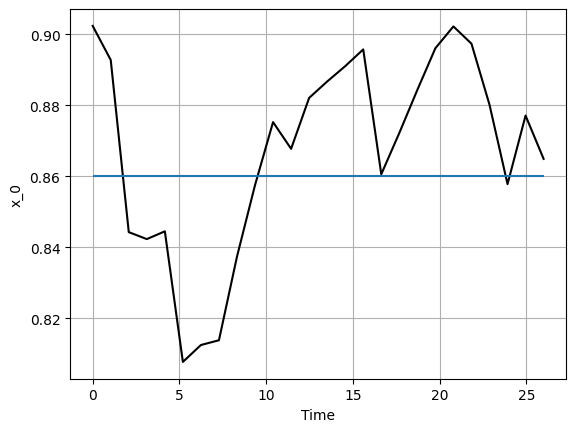

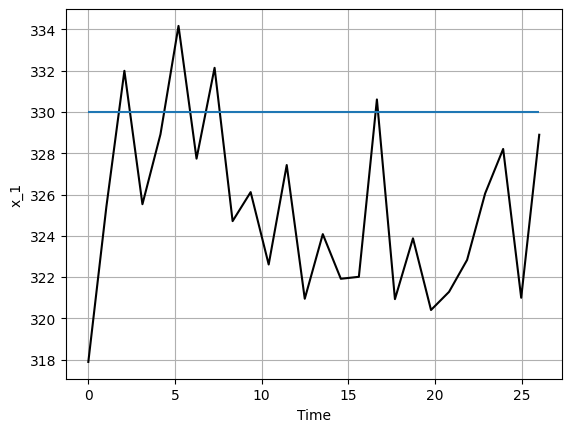

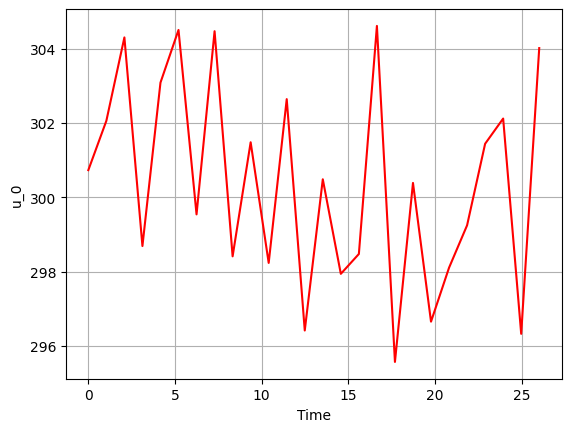

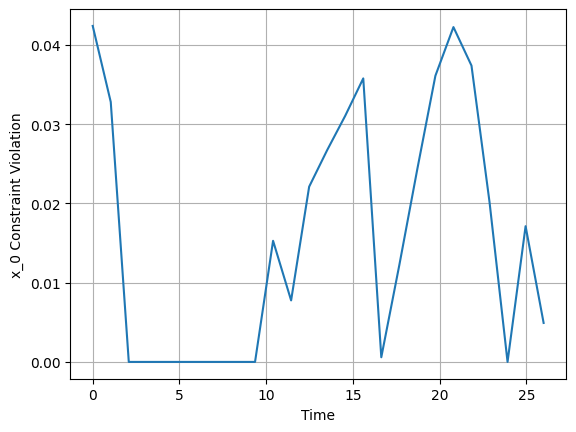

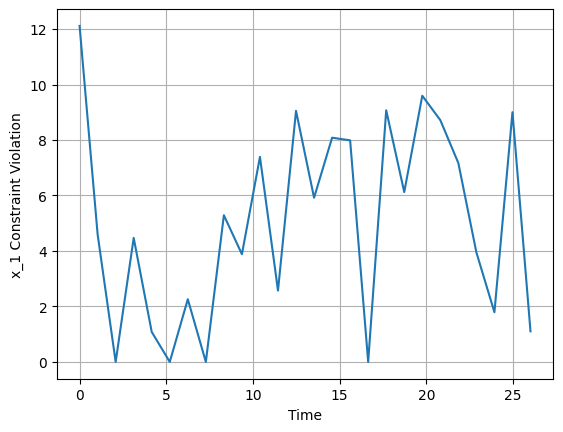

In [4]:
#Enter required setpoints for each state. Enter None for states without setpoints.
SP = {
    '0': [0.8 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
    '1': [330 for i in range(int(nsteps/2))] + [320 for i in range(int(nsteps/2))],
}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([305]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.1,200,0.8,320]),
    'high' : np.array([4,400,0.9,330])  
}

cons = {
    '0':0.86,
    '1' :330 
}

cons_type = {
    '0':'>=',
    '1':'<='
}
env_params = {
    'Nx': 2, # Number of states
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'Nu':1, # Number of control/actions
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'dt': 1, # Time step
    'x0': torch.tensor([0.8,273,0.8,320]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'r_scale': torch.tensor([5,1/15]), #Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'done_on_cons_vio':False,
    'constraints': cons, 
    'cons_type': cons_type,
    'r_penalty': 1000,
    'disturbance_active': True,
    'disturbance': 
}
env = Models_env(env_params)

c_info = sim(env,env_params)

# First Order System

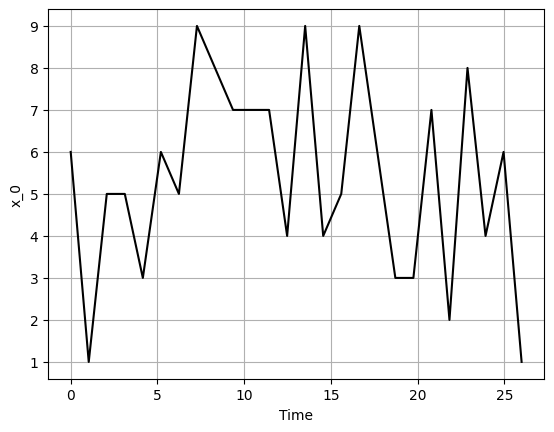

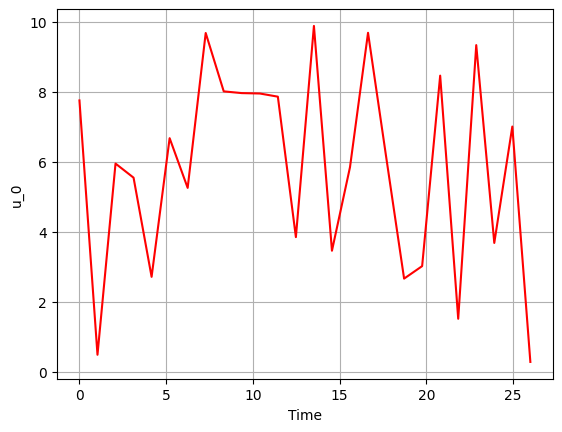

[]

In [4]:
SP = {
}

action_space = {
    'low': np.array([0]),
    'high':np.array([10]) 
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}

cons = {

    
}

cons_type = {
    '0':'>=',
    
}

env_params = {
    'Nx': 1,
    'N': nsteps,
    'tsim':T,
    'Nu':1,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0]),
    'model': 'first_order_system_ode', 
    'r_scale': torch.tensor([]),
    'done_on_cons_vio':False,
    'constraints': cons, 
    'cons_type': cons_type,
    'r_penalty': 1000
}
env = Models_env(env_params)

sim(env,env_params)